In [2]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf

from bbox import bbox_to_rect
from bbox import filter_overlapping_boxes
from bbox import caculate_area

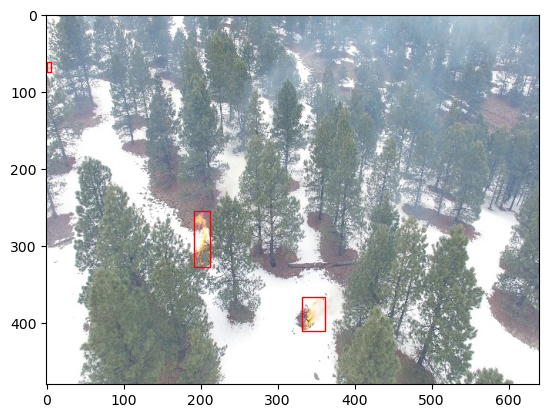

In [3]:
imageIndex = 1585

imagePath = '../JPEGImages/image_{}.jpg'.format(imageIndex)
xmlPath = '../Annotations/image_{}.xml'.format(imageIndex)

# pares xml
tree = ET.parse(xmlPath)
annotation = tree.getroot()
objects = annotation.findall('object')

bboxes = np.zeros((len(objects), 4))

for idx, object in enumerate(objects):
    bboxes[idx][0] = object.find('bndbox').find('xmin').text
    bboxes[idx][1] = object.find('bndbox').find('ymin').text
    bboxes[idx][2] = object.find('bndbox').find('xmax').text
    bboxes[idx][3] = object.find('bndbox').find('ymax').text

# draw
imageArray = plt.imread(imagePath)
fig = plt.imshow(imageArray)
for bbox in bboxes:
    fig.axes.add_patch(bbox_to_rect(bbox, 'red'))
